In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

folder_path = '/content/drive/MyDrive/crop_part1'

# List all image files in the folder
image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path)]
# No of images
print("Total number of images:", len(image_files))

images = []
age = []
gender = []

for img in image_files:
    # Read image
    image = cv2.imread(img)
    if image is None:
        print("Skipping:", img, "- Unable to read image")
        continue
    final = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Extract age and gender from file name
    file_name = os.path.basename(img)
    age_gender_info = file_name.split("_")

    if len(age_gender_info) < 3:
        print("Skipping:", img, "- Invalid file name format")
        continue

    ages = age_gender_info[0]
    genders = age_gender_info[1]

    images.append(np.array(final))
    age.append(int(ages))
    gender.append(int(genders))

age = np.array(age, dtype=np.int64)
images = np.array(images) / 255.0  # Scale images
gender = np.array(gender, dtype=np.uint64)

# Count the number of original females and males
num_females = np.sum(gender)
num_males = len(gender) - num_females

print("Number of original females:", num_females)
print("Number of original males:", num_males)



Total number of images: 2140


KeyboardInterrupt: 

2140
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 98, 98, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 47, 47, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 22, 22, 256)   

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


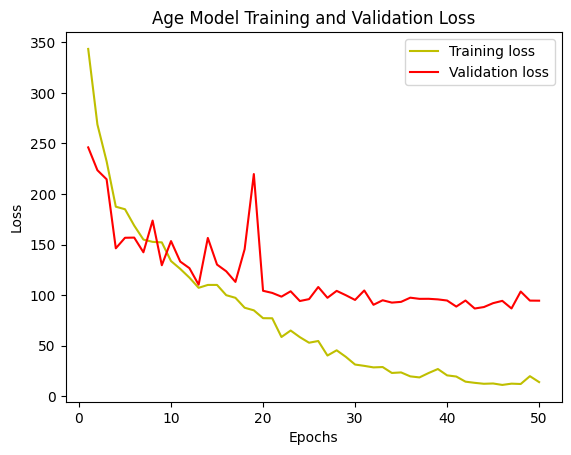

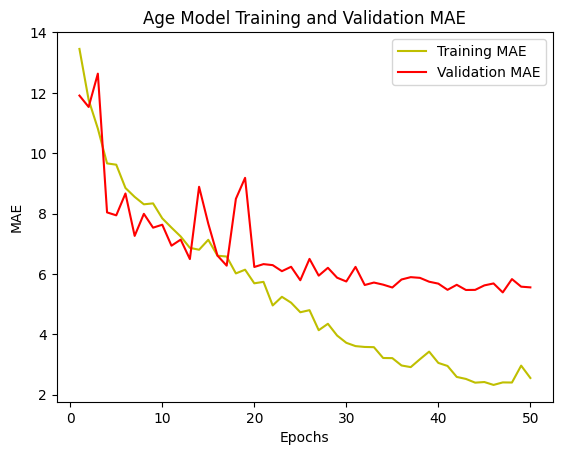

Mean Absolute Error for Age Model: 5.551816940307617


In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error
import seaborn as sns

data_directory = '/content/drive/MyDrive/crop_part1'

# List all image files in the data directory
image_files = [os.path.join(data_directory, filename) for filename in os.listdir(data_directory)]
# Number of images
print(len(image_files))
images_list = []
ages_list = []
genders_list = []

for image_path in image_files:
    #print(image_path)
    # Read image
    image = cv2.imread(image_path)
    if image is None:
        print("Skipping:", image_path, "- Unable to read image")
        continue
    final_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Extract age and gender from file name
    file_name = os.path.basename(image_path)
    age_gender_info = file_name.split("_")

    if len(age_gender_info) < 3:
        print("Skipping:", image_path, "- Invalid file name format")
        continue

    age = age_gender_info[0]
    gender = age_gender_info[1]

    images_list.append(np.array(final_image))
    ages_list.append(int(age))
    genders_list.append(int(gender))

ages_array = np.array(ages_list, dtype=np.int64)
images_array = np.array(images_list) / 255.0  # Scale images
genders_array = np.array(genders_list, dtype=np.uint64)

x_train_ages, x_test_ages, y_train_ages, y_test_ages = train_test_split(images_array, ages_array, random_state=42)

x_train_genders, x_test_genders, y_train_genders, y_test_genders = train_test_split(images_array, genders_array, random_state=42)

# Define age model and train
age_model = Sequential()
age_model.add(Conv2D(128, kernel_size=3, activation='relu', input_shape=(200, 200, 3)))
age_model.add(MaxPooling2D(pool_size=3, strides=2))

age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
age_model.add(MaxPooling2D(pool_size=3, strides=2))

age_model.add(Conv2D(256, kernel_size=3, activation='relu'))
age_model.add(MaxPooling2D(pool_size=3, strides=2))

age_model.add(Conv2D(512, kernel_size=3, activation='relu'))
age_model.add(MaxPooling2D(pool_size=3, strides=2))

age_model.add(Flatten())
age_model.add(Dropout(0.2))
age_model.add(Dense(512, activation='relu'))

age_model.add(Dense(1, activation='linear', name='age'))

age_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
print(age_model.summary())

history_age = age_model.fit(x_train_ages, y_train_ages,
                             validation_data=(x_test_ages, y_test_ages), epochs=50)

age_model.save('/content/drive/MyDrive/ANNA/modified_age_model_50epochs.h5')

history = history_age

# Plot the training and validation accuracy and loss at each epoch for age
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Age Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

mae = history.history['mae']
val_mae = history.history['val_mae']

plt.plot(epochs, mae, 'y', label='Training MAE')
plt.plot(epochs, val_mae, 'r', label='Validation MAE')
plt.title('Age Model Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Evaluate age model
mae_age = age_model.evaluate(x_test_ages, y_test_ages, verbose=0)[1]
print("Mean Absolute Error for Age Model:", mae_age)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 98, 98, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 47, 47, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 22, 22, 256)       0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


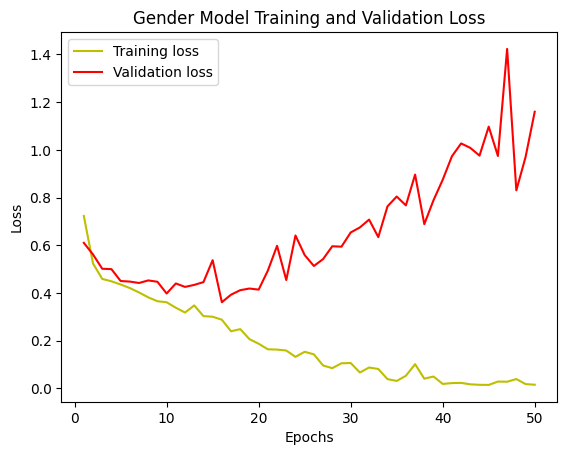

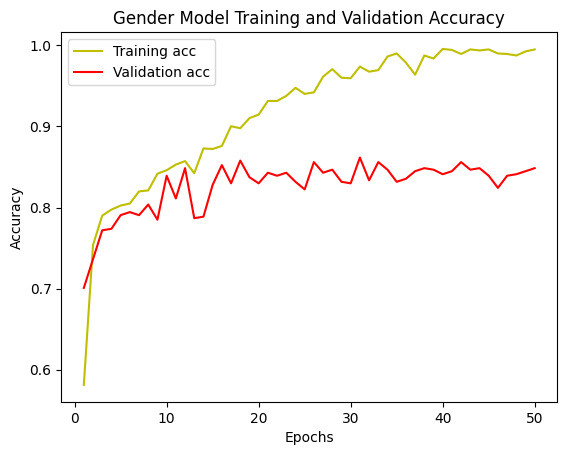

Accuracy for Gender Model: 0.8485981225967407


In [2]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from sklearn.model_selection import train_test_split

data_directory = '/content/drive/MyDrive/crop_part1'

# List all image files in the data directory
image_files = [os.path.join(data_directory, filename) for filename in os.listdir(data_directory)]

images_list = []
genders_list = []

for image_path in image_files:
    # Read image
    image = cv2.imread(image_path)
    if image is None:
        print("Skipping:", image_path, "- Unable to read image")
        continue
    final_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Extract gender from file name
    file_name = os.path.basename(image_path)
    gender = int(file_name.split("_")[1])

    images_list.append(np.array(final_image))
    genders_list.append(gender)

images_array = np.array(images_list) / 255.0  # Scale images
genders_array = np.array(genders_list, dtype=np.uint64)

x_train_genders, x_test_genders, y_train_genders, y_test_genders = train_test_split(images_array, genders_array, random_state=42)

# Define gender model and train
gender_model = Sequential()
gender_model.add(Conv2D(128, kernel_size=3, activation='relu', input_shape=(200, 200, 3)))
gender_model.add(MaxPooling2D(pool_size=3, strides=2))

gender_model.add(Conv2D(128, kernel_size=3, activation='relu'))
gender_model.add(MaxPooling2D(pool_size=3, strides=2))

gender_model.add(Conv2D(256, kernel_size=3, activation='relu'))
gender_model.add(MaxPooling2D(pool_size=3, strides=2))

gender_model.add(Conv2D(512, kernel_size=3, activation='relu'))
gender_model.add(MaxPooling2D(pool_size=3, strides=2))

gender_model.add(Flatten())
gender_model.add(Dropout(0.2))
gender_model.add(Dense(512, activation='relu'))

gender_model.add(Dense(1, activation='sigmoid', name='gender'))

gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(gender_model.summary())

history_gender = gender_model.fit(x_train_genders, y_train_genders,
                                   validation_data=(x_test_genders, y_test_genders), epochs=50)

gender_model.save('/content/drive/MyDrive/ANNA/CNN_gender_model.h5')

# Plot the training and validation accuracy and loss at each epoch for gender
loss_gender = history_gender.history['loss']
val_loss_gender = history_gender.history['val_loss']
epochs_gender = range(1, len(loss_gender) + 1)
plt.plot(epochs_gender, loss_gender, 'y', label='Training loss')
plt.plot(epochs_gender, val_loss_gender, 'r', label='Validation loss')
plt.title('Gender Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_gender = history_gender.history['accuracy']
val_acc_gender = history_gender.history['val_accuracy']
plt.plot(epochs_gender, acc_gender, 'y', label='Training acc')
plt.plot(epochs_gender, val_acc_gender, 'r', label='Validation acc')
plt.title('Gender Model Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate gender model
accuracy_gender = gender_model.evaluate(x_test_genders, y_test_genders, verbose=0)[1]
print("Accuracy for Gender Model:", accuracy_gender)


Age Model saved at: /content/drive/MyDrive/ANNA/modified_age_model_50epochs.h5
17/17 [==============================] - 1s 42ms/step


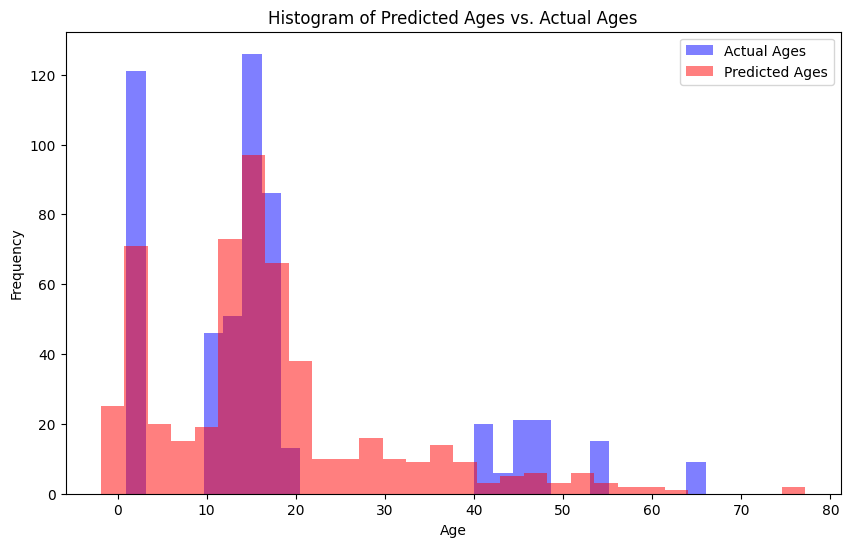

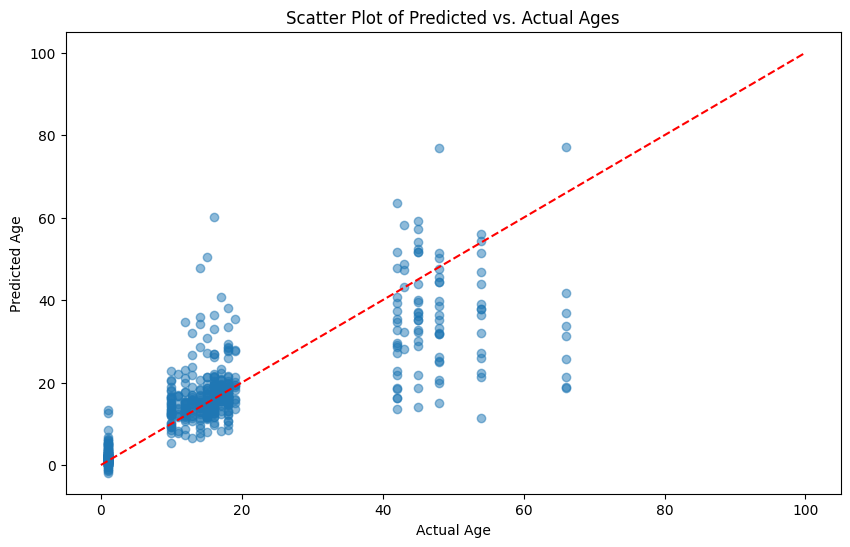

In [5]:
# Predict ages for the test set
age_model_path = '/content/drive/MyDrive/ANNA/modified_age_model_50epochs.h5'
print("Age Model saved at:", age_model_path)

predicted_ages = age_model.predict(x_test_ages)

# Histogram of Predicted Ages vs. Actual Ages
plt.figure(figsize=(10, 6))
plt.hist(y_test_ages, bins=30, alpha=0.5, color='blue', label='Actual Ages')
plt.hist(predicted_ages, bins=30, alpha=0.5, color='red', label='Predicted Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Ages vs. Actual Ages')
plt.legend()
plt.show()

# Scatter Plot of Predicted vs. Actual Ages
plt.figure(figsize=(10, 6))
plt.scatter(y_test_ages, predicted_ages, alpha=0.5)
plt.plot([0, 100], [0, 100], color='red', linestyle='--')  # Diagonal line representing perfect prediction
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Scatter Plot of Predicted vs. Actual Ages')
plt.show()


In [9]:
# Calculate split ratio
train_ratio = len(x_train_genders) / len(images_array)
test_ratio = len(x_test_genders) / len(images_array)

print("Training data split ratio:", train_ratio)
print("Testing data split ratio:", test_ratio)


Training data split ratio: 0.75
Testing data split ratio: 0.25


In [10]:
print("Size of x_train_genders:", x_train_genders.shape)
print("Size of x_test_genders:", x_test_genders.shape)
print("Size of y_train_genders:", y_train_genders.shape)
print("Size of y_test_genders:", y_test_genders.shape)

Size of x_train_genders: (1605, 200, 200, 3)
Size of x_test_genders: (535, 200, 200, 3)
Size of y_train_genders: (1605,)
Size of y_test_genders: (535,)


17/17 [==============================] - 1s 41ms/step


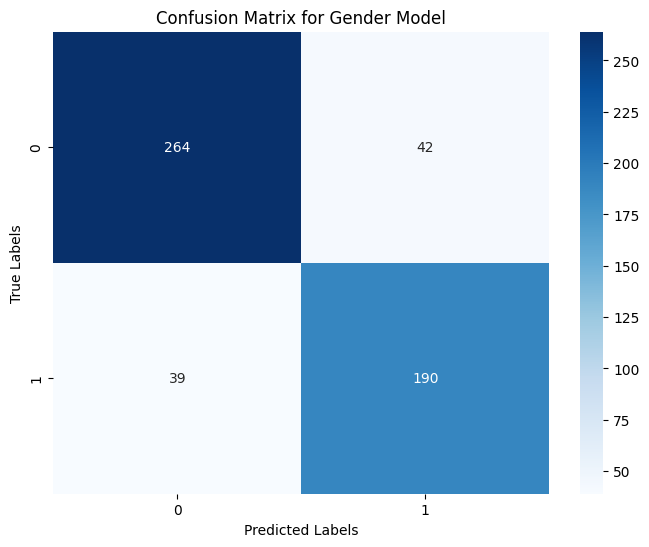

In [7]:
# Load the saved gender model
from keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
gender_model_path = '/content/drive/MyDrive/ANNA/CNN_gender_model.h5'
gender_model = load_model(gender_model_path)

# Predictions
y_pred_gender = gender_model.predict(x_test_genders)
y_pred_labels = (y_pred_gender >= 0.5).astype(int)

# Confusion Matrix
cm_gender = confusion_matrix(y_test_genders, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gender, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Gender Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
